# PA005: High Value Customer Identification (Insiders)

## 0.0. Planejamento da Solução

### Input - Entrada

1. Problema de Negócio
    - Seecionar os clientes mais valiosos para integrar um programa de fidelização


2. Conjunto de Dados
    - Vendas de um e-commerce onine, durante o período de um ano

### Output - Saída

1. A indicação das pessoas que farão parte do programa de Insiders
    - Lista: client_id | is_insider
             102030    |   yes/1
             203040    |   no/2
             
2. Relatório com as respostas das perguntas de negócio

- Quem são as pessoas elegíveis para participar do programa de Insiders ?
- Quantos clientes farão parte do grupo?
- Quais as principais características desses clientes ?
- Qual a porcentagem de contribuição do faturamento, vinda do Insiders ?
- Qual a expectativa de faturamento desse grupo para os próximos meses ?
- Quais as condições para uma pessoa ser elegível ao Insiders ?
- Quais as condições para uma pessoa ser removida do Insiders ?
- Qual a garantia que o programa Insiders é melhor que o restante da base ?
- Quais ações o time de marketing pode realizar para aumentar o faturamento?

### Tasks - Tarefas

1. Quem são as pessoas elegíveis para participar do programa de Insiders ?
    - O que é ser elegível? O que são clientes de maior valor?
    - Faturamento:
        - Alto ticket médio
        - Alto LTV
        - Baixa recência
        - Alto basket size
        - Baixa probabilidade de churn
        - Alta Previsão de LTV
        - Alta probabilidade de compra

    - Custo:
        - Baixa taxa de devolução
        
    - Experiência de compra:
        - Média alta das avaliações
        

2. Quantos clientes farão parte do grupo?
    - Número total de clientes 
        - Calcula a porcentagem do grupo insiders
        
        
3. Quais as principais características desses clientes ?
    - Escrever características do cliente:
        - Idade
        - Localização
        
    - Escrever caraterísitacas do consumo:
        - Atributos da Clusterização
        
        
4. Qual a porcentagem de contribuição do faturamento, vinda do Insiders ?
    - Faturamento total do ano
    - Faturameto do grupo Insiders
    
    
5. Qual a expectativa de faturamento desse grupo para os próximos meses ?
    - LTV do grupo Insiders
    - Análise de Cohort
    
    
6. Quais as condições para uma pessoa ser elegível ao Insiders ?
    - Definir a periodicidade
    - A pessoa precisa ser similar ou parecido com uma pessoa/grupo
    
    
7. Quais as condições para uma pessoa ser removida do Insiders ?
    - Definir a periodicidade
    - A pessoa precisa ser diferente com uma pessoa/grupo
    
    
8. Qual a garantia que o programa Insiders é melhor que o restante da base ?
    - Teste A/B
    - Teste A/B Bayesino
    - Teste de hipóteses
    
    
9. Quais ações o time de marketing pode realizar para aumentar o faturamento?
    - Desconto
    - Preferência de compra
    - Frete
    - Visita a empresa

# Descrição do Ciclo

- Tratamento de Dados mais aprofundado
- Recálculo das features e novas features
- Rescala dos dados

# <font color = 'green'> Imports </f>

In [1009]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
import seaborn as sns

from matplotlib import pyplot as plt
from IPython.display import HTML
from sklearn import cluster as c
from sklearn import metrics as mt
from sklearn import preprocessing as pp
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

from plotly import express as px
import umap.umap_ as umap

## <font color = 'green'> Helper Functions </f>

## <font color = 'green'> Load Dataset </f>

In [1010]:
# load data
df_raw = pd.read_csv('data/Ecommerce.csv',encoding='unicode_escape')

# Remove extra columns
df_raw = df_raw.drop(columns=['Unnamed: 8'],axis=1)

In [1011]:
df_raw.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

# <font color = 'green'> Data Description </f>

In [1012]:
df1 = df_raw.copy()

## <font color = 'green'> Rename Columns </f>

In [1013]:
cols_new = ['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date',
               'unit_price', 'customer_id', 'country']
df1.columns = cols_new

In [1014]:
df1.sample()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
11150,537240,21934,SKULL SHOULDER BAG,3,4-Dec-16,3.36,NaN,United Kingdom


## <font color = 'green'> Data dimensions </f>

In [1015]:
print('Rows: {}'.format(df1.shape[0]))
print('Columns: {}'.format(df1.shape[1]))

Rows: 541909
Columns: 8


## <font color = 'green'> Data Types </f>

In [1016]:
df1.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object

## <font color = 'green'> Check NA </f>

In [1017]:
df1.isna().sum()

invoice_no           0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
customer_id     135080
country              0
dtype: int64

## <font color = 'green'> Replace NA </f>

In [1018]:
# remover NA
df1 = df1.dropna( subset=['description','customer_id'])
print('Removed data: {:.2f}'.format(1 - (df1.shape[0]/df_raw.shape[0])))

Removed data: 0.25


In [1019]:
df1.isna().sum()

invoice_no      0
stock_code      0
description     0
quantity        0
invoice_date    0
unit_price      0
customer_id     0
country         0
dtype: int64

## <font color = 'green'> Change dtypes </f>

In [1020]:
df1.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object

In [1021]:
# invoice_date
df1['invoice_date'] = pd.to_datetime(df1['invoice_date'], format='%d-%b-%y')

# customer_id
df1['customer_id'] = df1['customer_id'].astype('int64')
df1.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,17850,United Kingdom


In [1022]:
df1.dtypes

invoice_no              object
stock_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
customer_id              int64
country                 object
dtype: object

## <font color = 'green'> Descreptive Analysis </f>

In [1023]:
num_attributes = df1.select_dtypes(include=['int64', 'float64'])
cat_attributes = df1.select_dtypes(exclude=['int64', 'float64', 'datetime64[ns]'])

### <font color = 'green'> Numerical Attributes </f>

In [1024]:
# cental tendency
ct1 = pd.DataFrame(num_attributes.apply( np.mean )).T
ct2 = pd.DataFrame(num_attributes.apply( np.median )).T

# dispersion - desvio padrão, mínimo, máximo, range, skew, kurtosis
d1 = pd.DataFrame(num_attributes.apply( np.std )).T
d2 = pd.DataFrame(num_attributes.apply( np.min )).T
d3 = pd.DataFrame(num_attributes.apply( np.max )).T
d4 = pd.DataFrame(num_attributes.apply( lambda x: x.max() - x.min() )).T
d5 = pd.DataFrame(num_attributes.apply( lambda x: x.skew() )).T
d6 = pd.DataFrame(num_attributes.apply( lambda x: x.kurtosis() )).T


# concatenate
m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m.columns=['attributes', 'min', 'max', 'range', 'mean', 'mediana', 'std', 'skew', 'kurtosis']
m

,attributes,min,max,range,mean,mediana,std,skew,kurtosis
0,quantity,-80995.0,80995.0,161990.0,12.061303,5.00,248.693064,0.182663,94317.563673
1,unit_price,0.0,38970.0,38970.0,3.460471,1.95,69.315077,452.219019,246924.542988
2,customer_id,12346.0,18287.0,5941.0,15287.690570,15152.00,1713.598197,0.029835,-1.179982


#### <font color = 'Red'> Numerical Attributes - Investigating </f>

1. Quantidade negativa de compras (pode ser devolução)
2. Preço unitário igual a zero (pode ser promoção)

### Categorical Attributes

In [1025]:
# letras no invoice
# quando possuir o "C" trata-se de um cancelamento
# única letra presenta na variável
cat_attributes['invoice_no'].apply(lambda x: re.search('[^0-9]+',x ).group(0) if bool(re.search('[^0-9]+',x )) else '').unique()

array(['', 'C'], dtype=object)

In [1026]:
# letras no stock code fazem parte do código do produto mas o código é composto principalmente de números
# quando apenas letras, não tratam-se de produtos
cat_attributes['stock_code'].apply(lambda x:  re.search('[^0-9]+',x ).group(0) if bool(re.search('[^0-9]+',x )) else '').unique()

array(['A', '', 'B', 'G', 'E', 'POST', 'L', 'C', 'S', 'BL', 'N', 'D', 'F',
       'T', 'H', 'M', 'R', 'K', 'P', 'V', 'J', 'W', 'BANK CHARGES', 'U',
       'PADS', 'Y', 'I', 'DOT', 'CRUK', 'O', 'Z'], dtype=object)

In [1027]:
# códigos que não parecem ser produtos. 
# Removar do dataset
cat_attributes['stock_code'].apply(lambda x:  re.search('^[a-zA-Z]+$',x ).group(0) if bool(re.search('^[a-zA-Z]+$',x )) else '').unique().tolist()

['', 'POST', 'D', 'M', 'PADS', 'DOT', 'CRUK']

# <font color = 'black'> Filtering Variables </f>

In [1028]:
df2 = df1.copy()

In [1029]:
# Removendo registros que nõ são compras de produtos

index = df2['stock_code'].apply( lambda x: bool(x in ['POST','PADS', 'DOT', 'CRUK']))
df2 = df2.loc[~index]

# <font color = 'green'> Feature Engineering </f>

In [1030]:
df_products = df2.copy()

## <font color = 'green'> Feature Creation </f>

In [1031]:
df_ref = df_products.drop(['invoice_no','stock_code','description',
          'quantity','invoice_date','unit_price',
          'country'],axis=1).drop_duplicates(ignore_index=True)

df_ref.head()

,customer_id
0,17850
1,13047
2,12583
3,13748
4,15100


In [1032]:
# Gross Revenue (Faturamento) quantity * price
df_products['gross_revenue'] = df_products['quantity'] * df_products['unit_price']
df_products.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,gross_revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,17850,United Kingdom,20.34


In [1033]:
# Invoices DataFrame

df3_invoice = df_products.groupby('invoice_no').agg(customer_id = ('customer_id', 'max'), 
                                          invoice_data = ('invoice_date', 'max'), 
                                          gross_revenue=('gross_revenue', 'sum')).reset_index()

df3_invoice['purchases'] = df3_invoice['invoice_no'].apply(lambda x: 1 if not(bool(re.search('[^0-9]+',x ))) else 0).astype('int64')
df3_invoice['returns'] = df3_invoice['invoice_no'].apply(lambda x: 1 if bool(re.search('[^0-9]+',x )) else 0).astype('int64')

df3_invoice.head()

,invoice_no,customer_id,invoice_data,gross_revenue,purchases,returns
0,536365,17850,2016-11-29,139.12,1,0
1,536366,17850,2016-11-29,22.20,1,0
2,536367,13047,2016-11-29,278.73,1,0
3,536368,13047,2016-11-29,70.05,1,0
4,536369,13047,2016-11-29,17.85,1,0


In [1034]:
# Customers DataFrame
df3_customers = df3_invoice.groupby('customer_id').agg(invoices = ('invoice_no', 'nunique'), 
                                                   frequency = ('invoice_data', 'nunique'),
                                                   purchases = ('purchases', 'sum'),
                                                   returns = ('returns', 'sum'),                                                      
                                                   last_purchase = ('invoice_data', 'max'),
                                                   gross_revenue = ('gross_revenue', 'sum'),
                                                   avg_ticket = ('gross_revenue', 'mean')).reset_index()

df3_customers.head()

,customer_id,invoices,frequency,purchases,returns,last_purchase,gross_revenue,avg_ticket
0,12346,2,1,1,1,2017-01-16,0.00,0.000000
1,12347,7,7,7,0,2017-12-05,4310.00,615.714286
2,12348,4,4,4,0,2017-09-23,1437.24,359.310000
3,12349,1,1,1,0,2017-11-19,1457.55,1457.550000
4,12350,1,1,1,0,2017-01-31,294.40,294.400000


In [1035]:
# monetary
df_ref = pd.merge(df_ref, df3_customers[['customer_id','gross_revenue']], on = 'customer_id', how = 'left')

# frequency
df_ref = pd.merge(df_ref, df3_customers[['customer_id','frequency']], on = 'customer_id', how = 'left')

# recency
df_aux = pd.merge(df_ref, df3_customers[['customer_id','last_purchase']], on = 'customer_id', how = 'left')
df_aux['recency'] = (df3['invoice_date'].max() - df_aux['last_purchase']).dt.days
df_ref = pd.merge(df_ref, df_aux[['customer_id','recency']], on = 'customer_id', how = 'left')

# avg_ticket
df_ref = pd.merge(df_ref, df3_customers[['customer_id','avg_ticket']], on = 'customer_id', how = 'left')

# returns
df_aux = pd.merge(df_ref, df3_customers[['customer_id','purchases', 'returns']], on = 'customer_id', how = 'left')
df_aux['returns'] = df_aux['returns'] / df_aux['purchases']
df_ref = pd.merge(df_ref, df_aux[['customer_id','returns']], on = 'customer_id', how = 'left')

In [1036]:
df_ref

,customer_id,gross_revenue,frequency,recency,avg_ticket,returns
0,17850,5288.63,3,302,151.103714,0.029412
1,13047,3079.10,14,31,171.061111,0.800000
2,12583,6629.34,17,2,389.961176,0.133333
3,13748,948.25,4,95,189.650000,0.000000
4,15100,635.10,6,330,105.850000,1.000000
...,...,...,...,...,...,...
4367,13436,196.89,1,1,196.890000,0.000000
4368,15520,343.50,1,1,343.500000,0.000000
4369,13298,360.00,1,1,360.000000,0.000000
4370,14569,227.39,1,1,227.390000,0.000000


# <font color = 'black'> Exploratory Data Analysis </f>

In [1037]:
df4 = df_ref.copy()

## Univariate Analysis

### Gross Revenue

<AxesSubplot:xlabel='gross_revenue', ylabel='Count'>

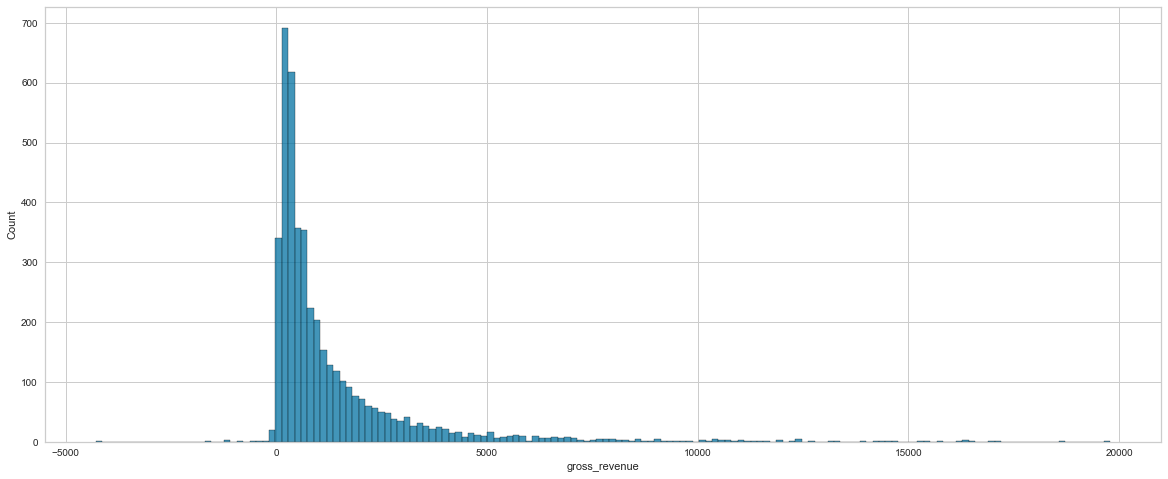

In [1038]:
plt.figure(figsize=(20,8))
sns.histplot(x = 'gross_revenue', data= df4.loc[df4['gross_revenue'] < 20000])

### Recency

<AxesSubplot:xlabel='recency', ylabel='Count'>

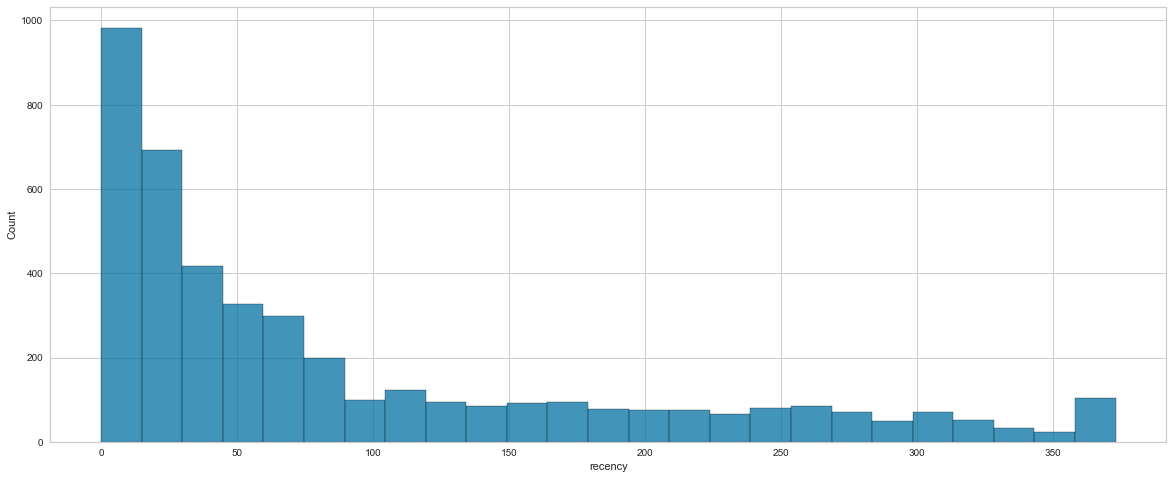

In [1039]:
plt.figure(figsize=(20,8))
sns.histplot(x = 'recency', data= df4)

### Frequency

<AxesSubplot:xlabel='frequency', ylabel='Count'>

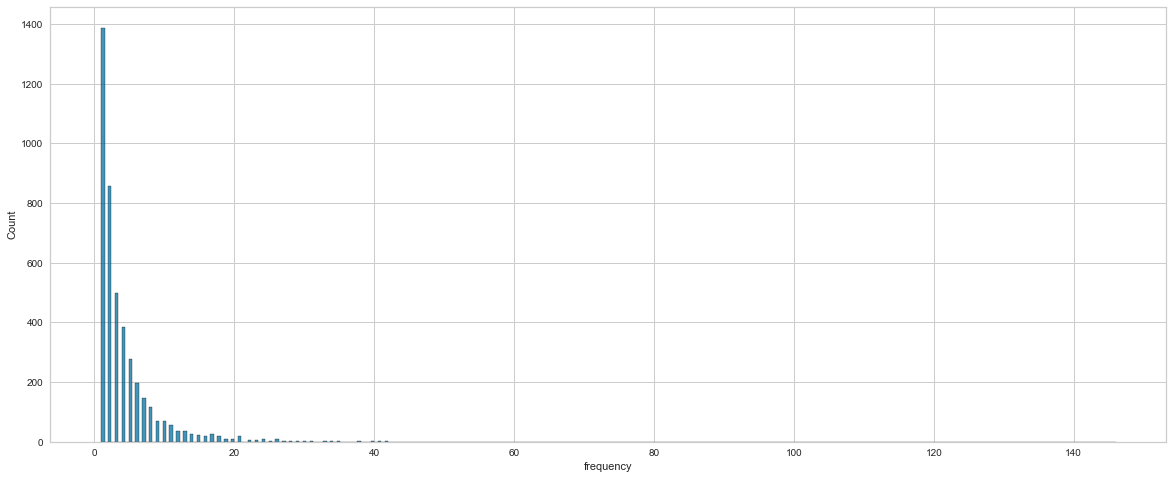

In [1040]:
plt.figure(figsize=(20,8))
sns.histplot(x = 'frequency', data= df4)

### Average Ticket

<AxesSubplot:xlabel='avg_ticket', ylabel='Count'>

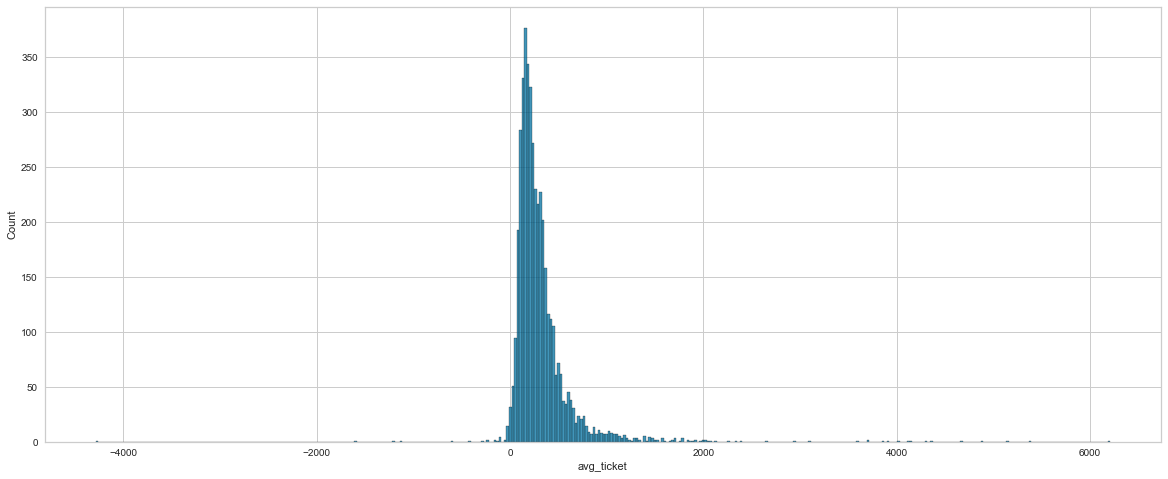

In [1041]:
plt.figure(figsize=(20,8))
sns.histplot(x = 'avg_ticket', data= df4)

### Returns

<AxesSubplot:xlabel='returns', ylabel='Count'>

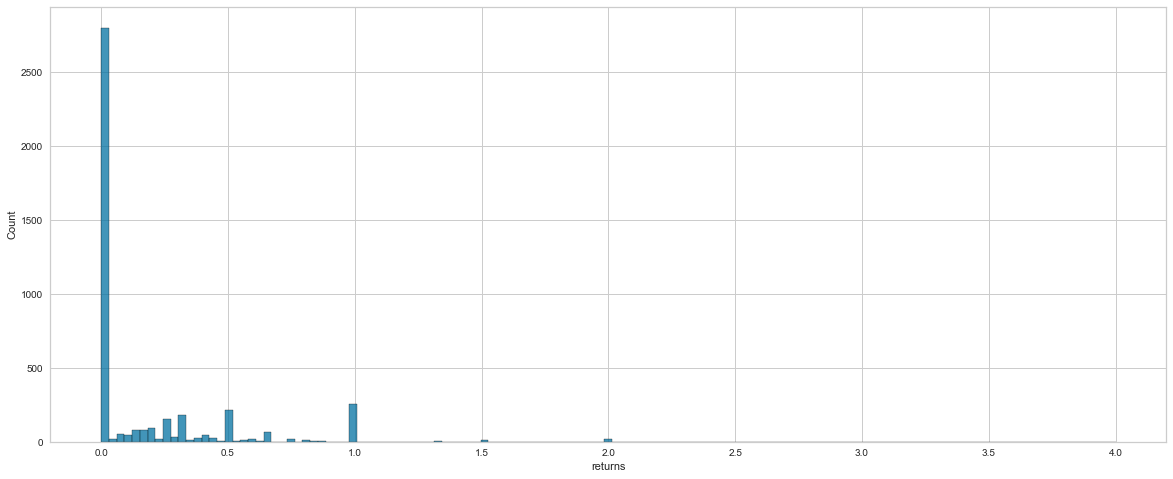

In [1042]:
plt.figure(figsize=(20,8))
sns.histplot(x = 'returns', data= df4)

# Filtering Variables

In [1043]:
df5 = df4.copy()

In [1044]:
# clientes não possuem Gross Revenue ou Ticket negativos, isso acontece pois a data de corte do dataframe pegou apenas a devolução e nao a compra
# filtrando registros de devolução de compras que aconteceram mas não estão nesse dataset 
df5 = df5.loc[(df5['gross_revenue'] >= 0) | (df5['avg_ticket'] >= 0) ]

# <font color = 'black'> Data Preparation </f>

In [1045]:
df6 = df5.copy()

## Rescaling

In [1047]:
rs = pp.RobustScaler()

df6['gross_revenue'] = rs.fit_transform(df6[['gross_revenue']])
df6['recency']       = rs.fit_transform(df6[['recency']])
df6['frequency']     = rs.fit_transform(df6[['frequency']])
df6['avg_ticket']    = rs.fit_transform(df6[['avg_ticket']])
df6['returns']       = rs.fit_transform(df6[['returns']])

In [1048]:
df6

,customer_id,gross_revenue,frequency,recency,avg_ticket,returns
0,17850,3.533426,0.25,2.073770,-0.402174,0.117647
1,13047,1.849346,3.00,-0.147541,-0.309712,3.200000
2,12583,4.555301,3.75,-0.385246,0.704455,0.533333
3,13748,0.225235,0.50,0.377049,-0.223589,0.000000
4,15100,-0.013445,1.00,2.303279,-0.611835,4.000000
...,...,...,...,...,...,...
4367,13436,-0.347444,-0.25,-0.393443,-0.190046,0.000000
4368,15520,-0.235699,-0.25,-0.393443,0.489200,0.000000
4369,13298,-0.223123,-0.25,-0.393443,0.565644,0.000000
4370,14569,-0.324197,-0.25,-0.393443,-0.048739,0.000000


# <font color = 'Black'> Feature Selection </f>

In [1049]:
df7 = df6.copy()

# <font color = 'Green'> Hyperparameter Fine Tuning </f>

In [1050]:
X = df7.drop(columns=['customer_id'])

In [1051]:
clusters = [2,3,4,5,6,7]

## <font color = 'Green'> Within-Cluster Sum of Square (WSS) </f>

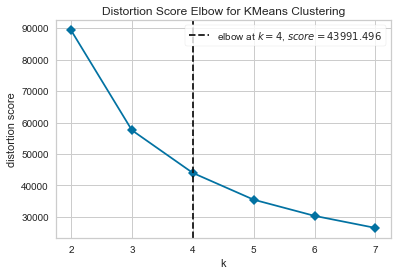

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [1052]:
kmeans = KElbowVisualizer(c.KMeans(), k = clusters, timings = False)
kmeans.fit( X )
kmeans.show()

## <font color = 'green'> Silhouette Score (WSS) </f>

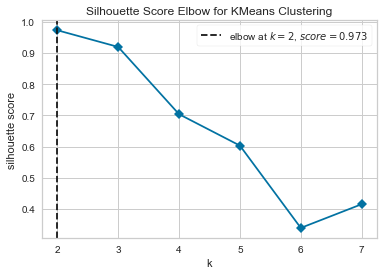

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [1053]:
kmeans = KElbowVisualizer(c.KMeans(), k = clusters,metric = 'silhouette', timings = False)
kmeans.fit( X )
kmeans.show()

### <font color = 'green'> Silhouette Analysis </f>

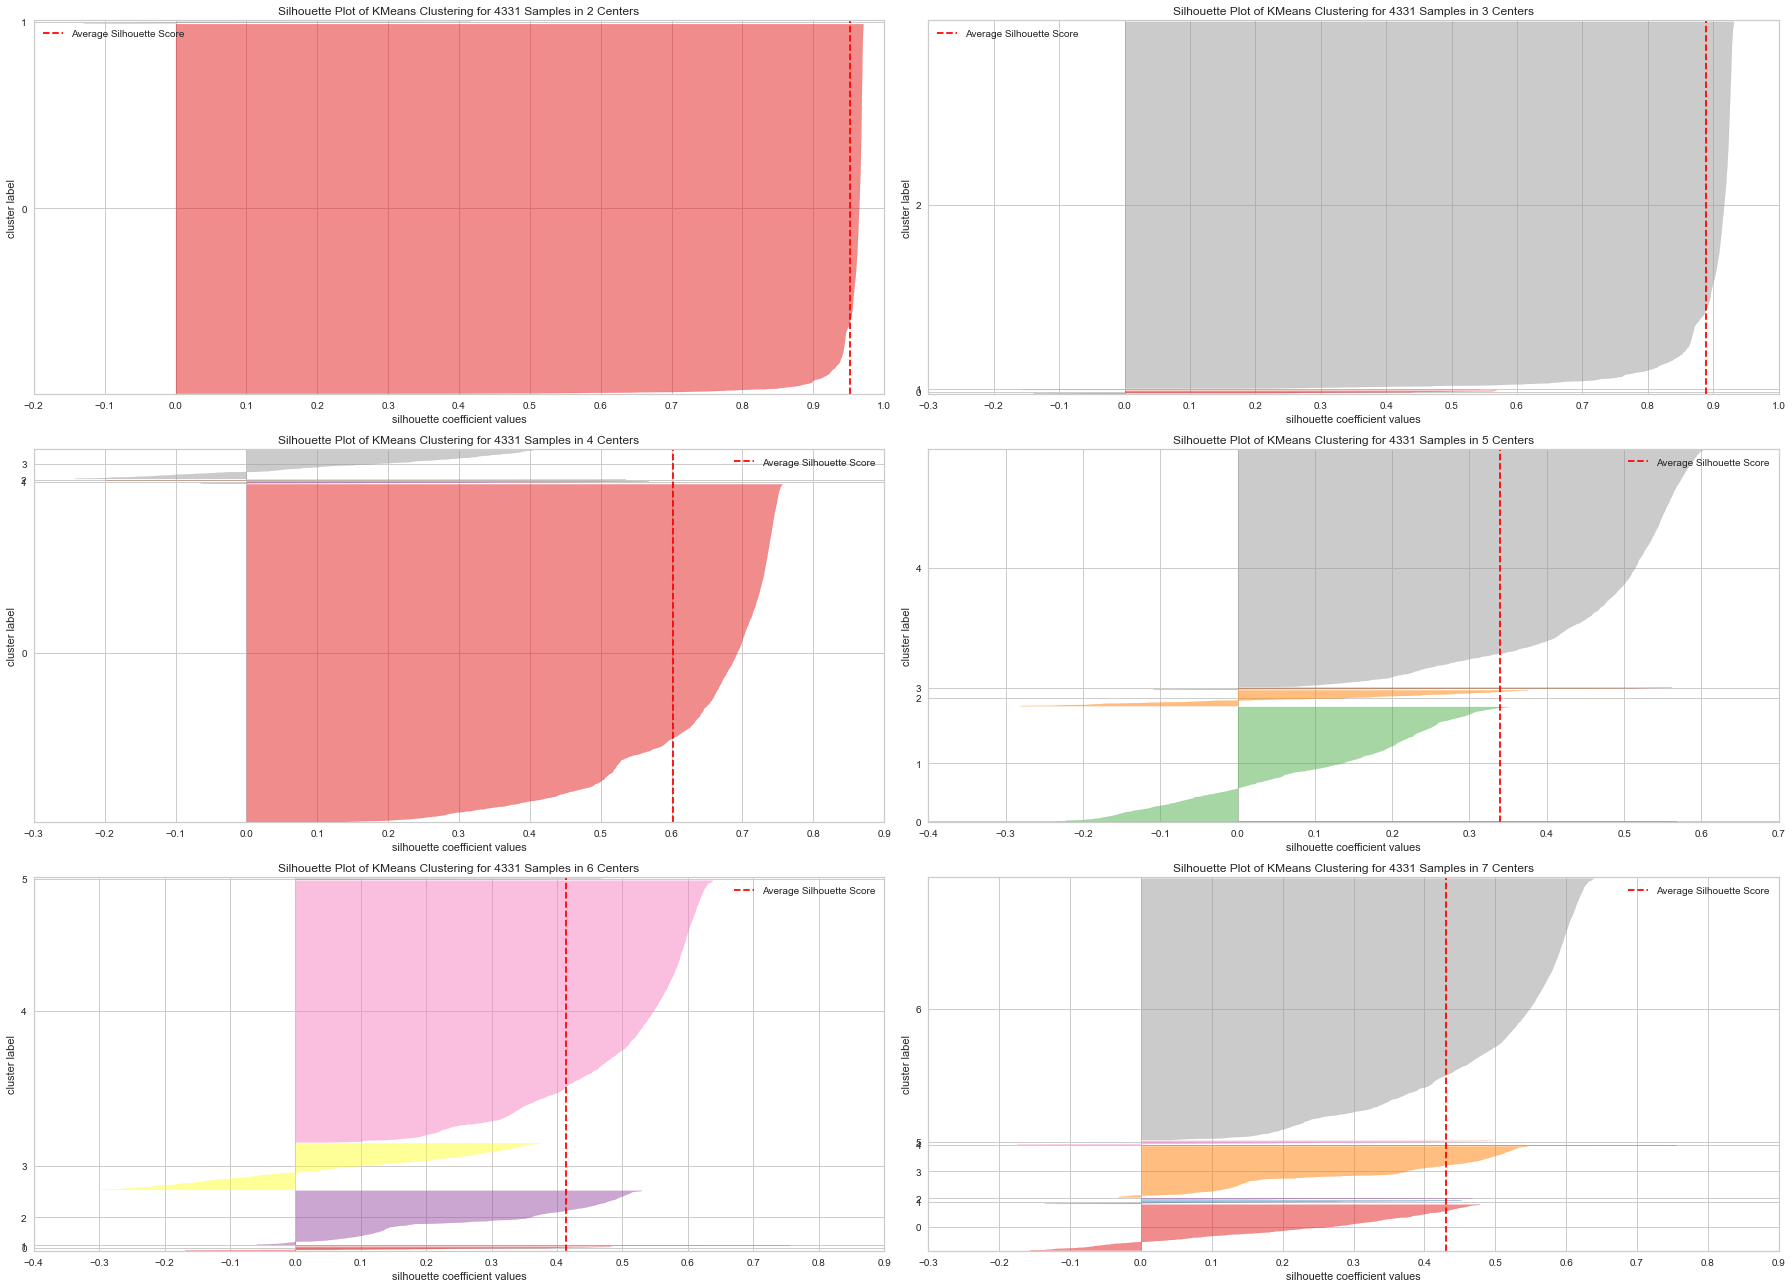

In [1054]:
fig, ax = plt.subplots(3,2,figsize=(25,18))
for k in clusters:
    kn = c.KMeans(n_clusters = k, init = 'random', n_init=10, max_iter=100, random_state=42)
    
    q, mod = divmod(k,2)
    visualizer = SilhouetteVisualizer(kn, color='yellowbrick',ax=ax[q-1,mod])
    visualizer.fit(X)
    visualizer.finalize()
    plt.tight_layout()

# <font color = 'green'> Training Model </f>

## <font color = 'green'> K-Means </f>

In [1055]:
# model definition
k = 3

# model training
kmeans = c.KMeans(init='random',n_clusters=k, n_init=10, max_iter=300, random_state=42)
kmeans.fit( X )

# clustering
labels = kmeans.labels_

## <font color = 'green'> Cluster Validation </f>

In [1098]:
## WSS (Within Clusters Sum of Square)
print('WSS value: {}'.format(kmeans.inertia_))

## SS (Silhouette Score)

print('SS: {}'.format(mt.silhouette_score(X,labels=labels, metric='euclidean')))

WSS value: 59264.33892159252
SS: 0.8896132504453842


# <font color = 'green'> Cluster Analysis </f>

In [1057]:
# dataset de treino sem transformação
df9 = df5.copy()

# inserindo clusters
df9['cluster'] = labels

df9.head()

,customer_id,gross_revenue,frequency,recency,avg_ticket,returns,cluster
0,17850,5288.63,3,302,151.103714,0.029412,2
1,13047,3079.10,14,31,171.061111,0.800000,2
2,12583,6629.34,17,2,389.961176,0.133333,2
3,13748,948.25,4,95,189.650000,0.000000,2
4,15100,635.10,6,330,105.850000,1.000000,2


## <font color = 'green'> Visualization Inspection </f>

In [1058]:
fig = px.scatter_3d(df9,x='avg_ticket',y='frequency',z='gross_revenue',color='cluster')
fig.show()

### <font color = 'green'> 2D Plot </f>

In [1059]:
df9.head()

,customer_id,gross_revenue,frequency,recency,avg_ticket,returns,cluster
0,17850,5288.63,3,302,151.103714,0.029412,2
1,13047,3079.10,14,31,171.061111,0.800000,2
2,12583,6629.34,17,2,389.961176,0.133333,2
3,13748,948.25,4,95,189.650000,0.000000,2
4,15100,635.10,6,330,105.850000,1.000000,2


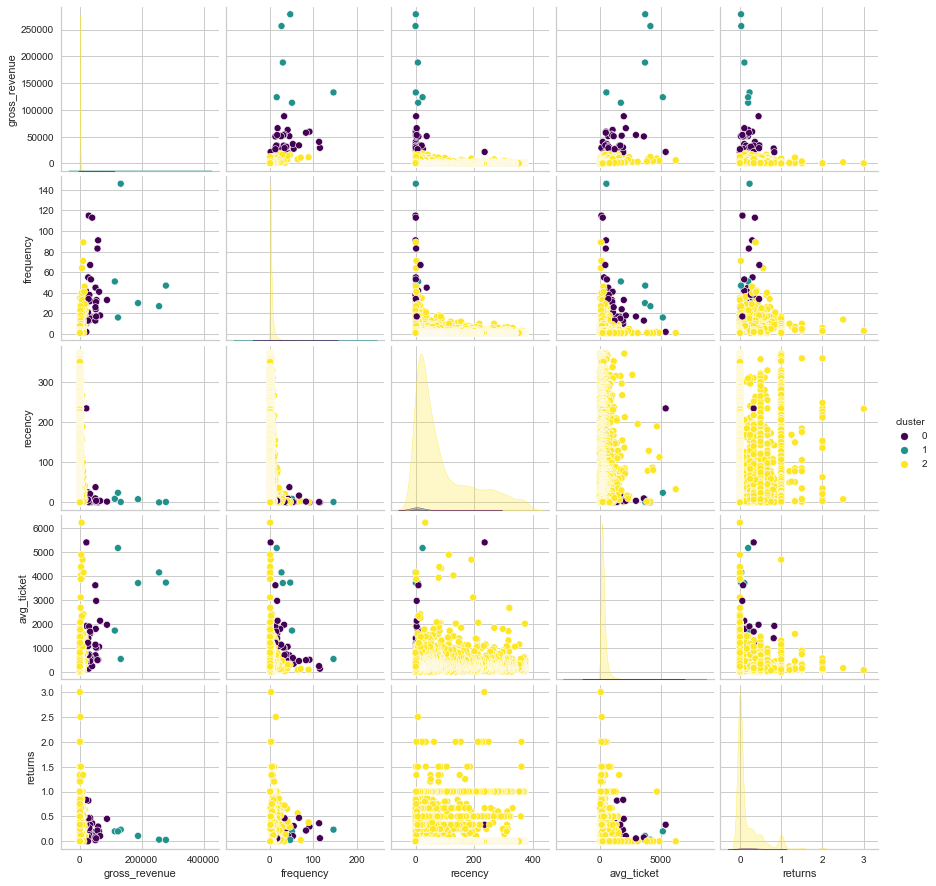

In [1060]:
df_viz = df9.drop(columns='customer_id',axis=1)
sns.pairplot(df_viz, hue='cluster', palette='viridis');

### <font color = 'green'> UMAP </f>

<AxesSubplot:xlabel='embedding_x', ylabel='embedding_y'>

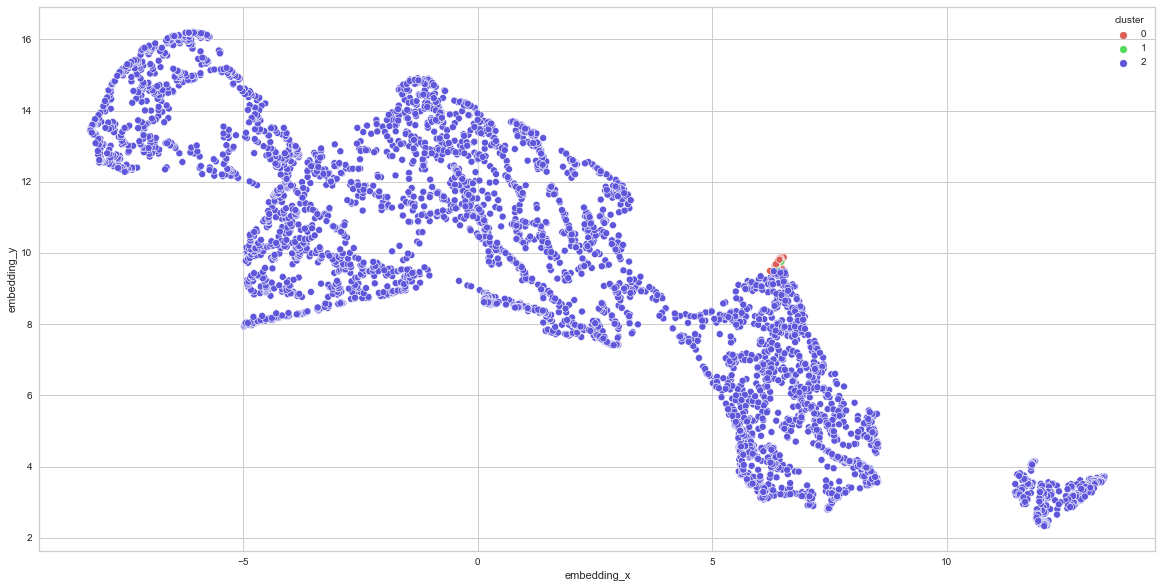

In [1061]:
reducer = umap.UMAP( n_neighbors = 80, random_state=0)
embedding = reducer.fit_transform( X )

# embedding
df_viz['embedding_x'] = embedding[:,0]
df_viz['embedding_y'] = embedding[:,1]

# plot UMAP
fig = plt.figure(figsize=(20,10))
# px.scatter_3d(x='embedding_x',y='embedding_y',z='embedding_z',color='cluster',data_frame=df_viz).show()
sns.scatterplot(x='embedding_x',y='embedding_y', hue = 'cluster', palette = sns.color_palette('hls', n_colors=len(df_viz['cluster'].unique())), data=df_viz)

## <font color = 'green'> Cluster Profile </f>

In [1076]:
# dataset com granularidade de produto sem transformação
df_products_cluster = pd.merge(df_products, df9[['customer_id', 'cluster']], on = 'customer_id', how = 'right')

In [1096]:
# Number of Customers
df_cluster = df_products_cluster[['customer_id', 'cluster']].groupby('cluster').agg( customer_id = ('customer_id', 'nunique')).reset_index()
df_cluster['perc_customer'] = 100*(df_cluster['customer_id'] / df_cluster['customer_id'].sum())

# Average Gross Revenue
df_avg_gross_revenue = df_products_cluster[['gross_revenue','cluster']].groupby('cluster').sum().reset_index()
df_avg_gross_revenue['perc_gross'] = 100*(df_avg_gross_revenue['gross_revenue']/df_avg_gross_revenue['gross_revenue'].sum())
df_cluster = pd.merge(df_cluster,df_avg_gross_revenue,how='left',on='cluster')

# Average Recency Days
df_avg_recency_days = df9[['recency','cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster,df_avg_recency_days,how='left',on='cluster')

# Average Invoices
df_avg_invoices = df_products_cluster[['invoice_no','cluster']].groupby('cluster').count().reset_index()
df_avg_invoices['perc_invoices'] = 100*(df_avg_invoices['invoice_no']/df_avg_invoices['invoice_no'].sum())
df_cluster = pd.merge(df_cluster,df_avg_invoices,how='left',on='cluster')

# Average Ticket
df_avg_ticket = df9[['avg_ticket','cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster,df_avg_ticket,how='left',on='cluster')

df_cluster

,cluster,customer_id,perc_customer,gross_revenue,perc_gross,recency,invoice_no,perc_invoices,avg_ticket
0,0,34,0.785038,1313023.860,15.929706,12.647059,34342,8.471119,1255.901464
1,1,6,0.138536,1092920.020,13.259390,7.166667,10945,2.699796,3157.934215
2,2,4291,99.076426,5836667.901,70.810904,90.668609,360114,88.829085,309.007804


### Cluster 01: Candidato à Insider 
    - Número de Customers: 6 (0.14% da base)
    - Recência média: 7 dias
    - Compras em média: 89 compras
    - Receita em média: R$ 182.182,00 dolares
    
    
### Cluster 02:
    - Número de Customers: 31 (0.71% da base)
    - Recência média: 13 dias
    - Compras em média: 18 compras
    - Receita em média: R$ 40.543,00 dolares
    
### Cluster 00: 
    - Número de Customers: 4335 (99.15% da base)
    - Recência média: 92 dias
    - Compras em média: 5 compras
    - Receita em média: R$ 1.372,00 dolares

# <font color = 'black'> Deploy to Production </f>

# <font color = 'green'> Sand Box </f>

## <font color = 'b'> 11.1. Original Dataset </f>

In [54]:
from sklearn import cluster as c

from sklearn.datasets import make_blobs
from yellowbrick.cluster import SilhouetteVisualizer, KElbowVisualizer
from matplotlib import pyplot as plt

C:\Users\Notebook\anaconda3\envs\insiders-clustering-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


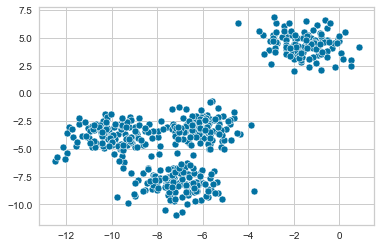

In [55]:
X, y= make_blobs(n_samples=500,
                 centers = 4,
                 cluster_std=1,
                 center_box = [-10,10],
                 shuffle=True,
                 random_state=1)

sns.scatterplot(X[:,0],X[:,1]);

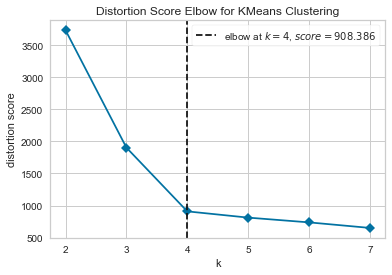

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [56]:
kmeans = KElbowVisualizer(c.KMeans(), k = clusters, timings = False)
kmeans.fit( X )
kmeans.show()

## <font color = 'b'> 11.2. Silhoutte Analysis </f>

IndexError: index 2 is out of bounds for axis 0 with size 2

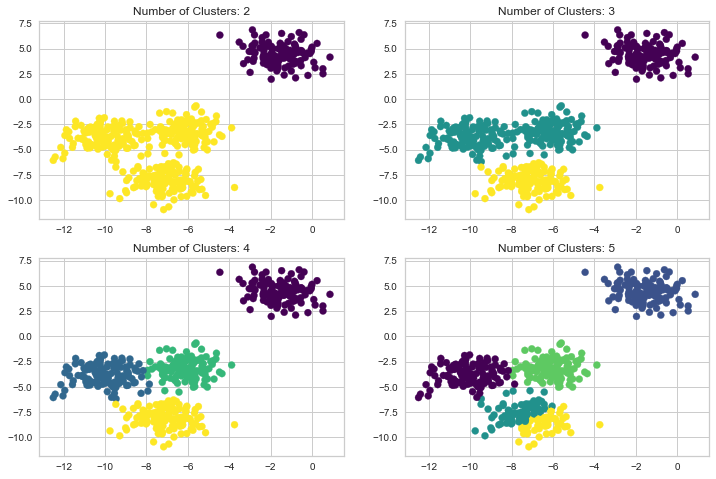

In [57]:
fig, ax = plt.subplots(2, 2, figsize=(12,8))
for i in clusters:
    kmeans = c.KMeans(n_clusters=i, init='k-means++',n_init=10,max_iter=300, random_state=42)
    kmeans.fit(X)
    
    q, mod = divmod(i,2)
    ax[q-1,mod].scatter(X[:,0],X[:,1],c=kmeans.labels_,cmap='viridis')
    ax[q-1,mod].set_title('Number of Clusters: {}'.format(i))

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(12,8))
for i in clusters:
    kmeans = c.KMeans(n_clusters=i, init='k-means++',n_init=10,max_iter=300, random_state=42)
    
    q, mod = divmod(i,2)
    
    visualizer = SilhouetteVisualizer(kmeans,colors='yellowbrick',ax=ax[q-1,mod])
    visualizer.fit(X)
    visualizer.finalize()
    plt.tight_layout()